# Wealth Distribution, Firm Dynamics, and Inequality

Undergraduate Computational Macro

Jesse Perla (University of British Columbia)

# Overview

## Motivation and Materials

-   In this lecture, we will introduce wealth and income distributions
    and the dynamics that lead to their shape
-   In addition, we will investigate the role of multiplicative growth
    in firm dynamics
-   This will also let us explore heavy-tailed distributions and get a
    sense of when they will influence inequality

## Materials

-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [Wealth Distribution
        Dynamics](https://julia.quantecon.org/introduction_dynamics/wealth_dynamics.html)
-   Other references in the Python lectures by Stachurski and Sargent
    -   [Heavy-Tailed
        Distributions](https://intro.quantecon.org/heavy_tails.html)
    -   [Kesten
        Processes](https://python.quantecon.org/kesten_processes.html)

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, BenchmarkTools
using Plots.PlotMeasures, StatsPlots
default(;legendfontsize=16, linewidth=2, tickfontsize=12,
         bottom_margin=15mm)

# Tails of Distributions

## Counter-CDFs

-   The counter-CDF is the probability that the value is above a certain
    value
-   It is the complement of the CDF $$
    \mathbb{P}(X > x) = 1 - \mathbb{P}(X \leq x)
    $$
-   Or, if there is a density $f(x)$, then $$
    \int_{x}^\infty f(x) dx
    $$

## CCDF for the Normal

-   The lognormal distribution is often used to model returns


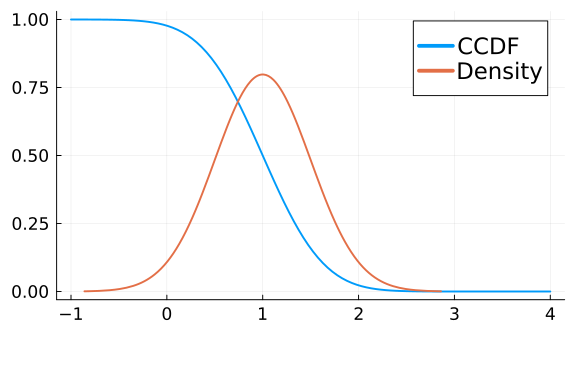

In [1]:
mu = 1.0
sigma = 0.5
dist = Normal(mu, sigma)
x = range(-1.0, 4.0, length = 100)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(dist; label = "Density")

## CCDF for the LogNormal

-   The lognormal distribution is often used to model returns


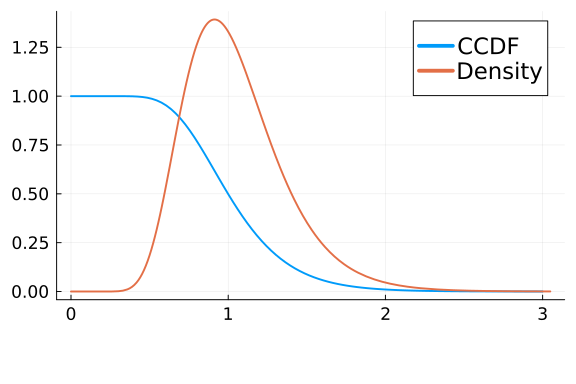

In [1]:
mu = -0.001
sigma = 0.3
dist = LogNormal(mu, sigma)
x = range(0.0, 3.0, length = 100)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(dist; label = "Density")

## The Pareto Distribution

-   Those distributions have relatively few large (or small) values
-   The Pareto distribution has a heavy tail
    -   It is often used to model wealth, city sizes, and other
        phenomena where there are many small values and a few large ones
-   The density, given min-value $x_m$ and a shape parameter $\alpha$ $$
    f(x) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}},\text{for all } x \geq x_m
    $$
-   CDF is $F(x) = 1 - \left(\frac{x}{x_m}\right)^{-\alpha}$, CCDF =
    $\left(\frac{x}{x_m}\right)^{-\alpha}$, for $x \geq x_m$

## CCDF for the Pareto with $\alpha = 2.5$

-   As you can see, the CCDF drops fairly slowly

mean(dist) = 1.6666666666666667
var(dist) = 2.2222222222222223


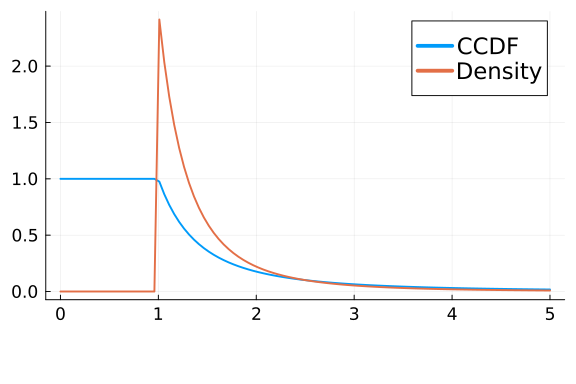

In [1]:
x_m = 1.0
alpha = 2.5
x = range(0.0, 5.0, length = 100)
dist = Pareto(alpha, x_m)
@show mean(dist)
@show var(dist)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(x, dist; label = "Density")

## CCDF for the Pareto with $\alpha = 1.0$

-   With a smaller $\alpha$ it is even heavier tailed, and doesn’t have
    a variance

mean(dist) = 100.99999999999991
var(dist) = Inf


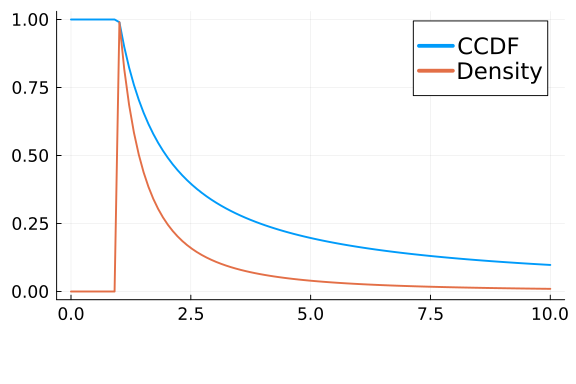

In [1]:
x_m = 1.0
alpha = 1.01
x = range(0.0, 10.0, length = 100)
dist = Pareto(alpha, x_m)
@show mean(dist)
@show var(dist)
plot(x, 1 .- cdf(dist, x);
     label = "CCDF", size = (600, 400))
plot!(x, dist; label = "Density")

## Log-Log Plots

-   The CCDF is often plotted on a log-log scale. i.e. $\log(x)$
    vs. $\log(1 - F(x))$

-   Taking the log of the probability lets us see the speed that the
    tail drops off

-   For the Pareto distribution, the CCDF is $$
    \left(\frac{x}{x_m}\right)^{-\alpha}
    $$

    -   Taking the log of this gives $$
        \alpha \log(x_m) - \alpha \log(x)
        $$

## Log-Log Plot for the Pareto


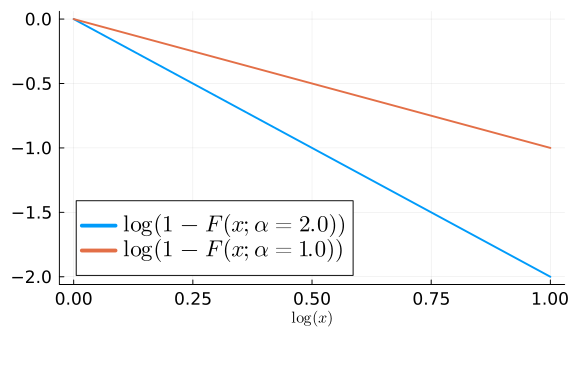

In [1]:
x_m = 1.0
x = range(1.0, exp(1), length = 100)
plot(log.(x),
     log.(1 .- cdf(Pareto(2.0, x_m), x));
     label = L"\log(1-F(x;\alpha=2.0))",
     xlabel = L"\log(x)", size = (600, 400),
     legend = :bottomleft)
plot!(log.(x),
     log.(1 .- cdf(Pareto(1.0, x_m), x));
     label = L"\log(1-F(x;\alpha=1.0))")

## Log-Log Plot for LogNormal vs. Pareto


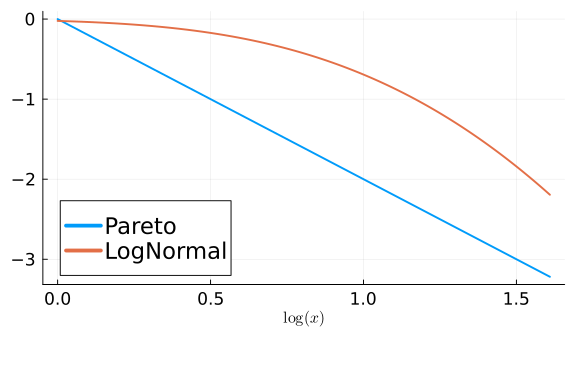

In [1]:
x_m = 1.0
x = range(1.0, 5, length = 100)
plot(log.(x),
     log.(1 .- cdf(Pareto(2.0, x_m), x));
     label = "Pareto",
     xlabel = L"\log(x)", size = (600, 400),
     legend = :bottomleft)
plot!(log.(x),
     log.(1 .- cdf(LogNormal(1.0, 0.5), x));
     label = "LogNormal")

## Heavy Tailed Distributions

-   See [Heavy-Tailed
    Distributions](https://intro.quantecon.org/heavy_tails.html) by
    Stachurski and Sargent for more
-   We previously looked at the LLN and Monte Carlo methods for
    calculating functions of a distribution from samples
-   Crucial in these was a question of whether a particular distribution
    had a particular moment.
    -   e.g. for the Cauchy distribution, the mean does not even exist

## Power-Law Tails

-   The Pareto distribution is a special case of a power-law
    distribution
-   A power-law distribution asymptomatically behaves like a Pareto
    distribution, with some $\alpha$ tail parameter.
    i.e. $\mathbb{P}(X > x) \propto x^{-\alpha}$ for large $x$
-   More formally, there exists some $c$ and some $\alpha > 0$ such that
    $$
    \lim_{x\to\infty} x^{\alpha} \mathbb{P}(X > x) = c
    $$

## Failures of LLNs?

-   For power-law tails, you may find that the not all moments exist
-   In particular, for a Power-law distribution, there are only moments
    for $k < \alpha$
    -   For example, with $\alpha = 1$ the mean and variance don’t exist
    -   For $\alpha = 1.8$ the mean exists, but the variance doesn’t
-   Of course, with finite data you will always be able to find a mean
    and variance, but with more data you may see them diverge

## Example with Pareto and $\alpha = 3$

var(dist) + mean(dist) ^ 2 = 3.0


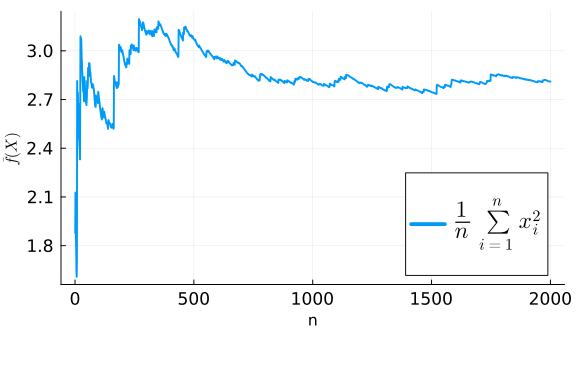

In [1]:
N = 2000
dist = Pareto(3.0, 1.0)
@show var(dist) + mean(dist)^2
x_draws = rand(dist, N)
f_x_draws = x_draws.^2
f_means = cumsum(f_x_draws)./(1:N)
plot(1:length(f_means), f_means;
     label=L"\frac{1}{n}\sum_{i=1}^n x_i^2",
     xlabel="n", ylabel=L"\bar{f}(X)",
     size=(600,400))

## Example with Pareto and $\alpha = 1.0$


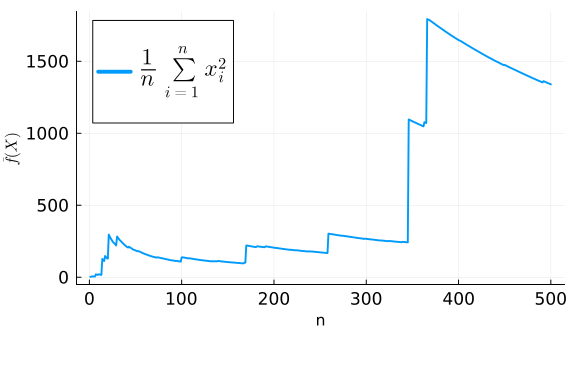

In [1]:
N = 500
dist = Pareto(1.0, 1.0)
x_draws = rand(dist, N)
f_x_draws = x_draws.^2
f_means = cumsum(f_x_draws)./(1:N)
plot(1:length(f_means), f_means;
     label=L"\frac{1}{n}\sum_{i=1}^n x_i^2",
     xlabel="n", ylabel=L"\bar{f}(X)",
     size=(600,400))

## Empirical CDFs

-   Given a pmf, $p$, of a discrete-valued random variable with ordered
    values, we can do the CDF as $F(x_i) = \sum_{j=1}^i p(x_j)$
-   We can find an [empirical
    counterpart](https://en.wikipedia.org/wiki/Empirical_distribution_function)
    for an unweighted vector $\{X_n\}_{n=1}^N$ of observations as

$$
\hat{F}(x) = \frac{\text{number of observations } X_n \leq x}{N}
$$

-   With the equivalent CCDF as $1 - \hat{F}(x)$.

## Empirical CDF with Discrete Number of Values

-   If there are a finite number of values, count the observations


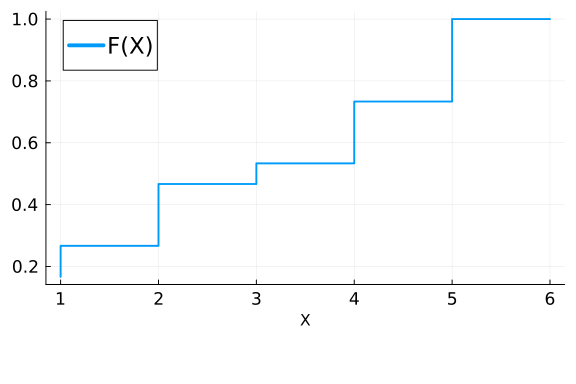

In [1]:
X_data = sort(rand(1:6, 30))
X = unique(X_data)
counts = [sum(X_data .== x) for x in X]
cumulative_counts = cumsum(counts)
F = cumulative_counts / length(X_data)
plot(X, F; xlabel="X", label = "F(X)",
     seriestype = :steppre,
     size = (600, 400))

## Empirical CDF from Continuous Data

-   In cases where the data is continuous counting is just sorting


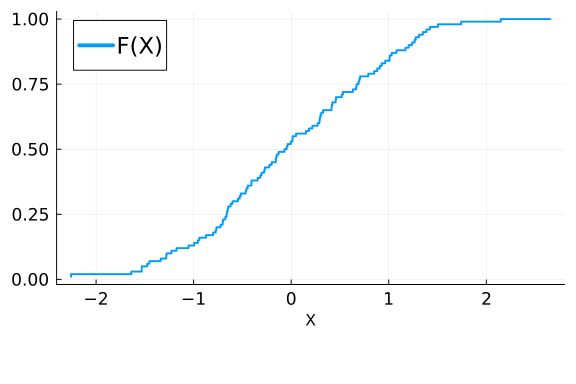

In [1]:
n = 100
X_data = randn(n)
F = (1:n) / n
plot(sort(X_data), F; xlabel="X",
     label = "F(X)", seriestype = :steppre,
     size = (600, 400))

## (Crude) Tail Parameter Estimation

-   The tail parameter $\alpha$ is the negative slope of the log-log
    plot of the CCDF
-   Hence, we use a linear regression. Tail parameter $\alpha = -a$ $$
    \underbrace{\log(1 - F_i)}_{\equiv y_i} = b + a \underbrace{\log(X_i)}_{\equiv x_i} + \epsilon_i
    $$
    -   Run regression with package
        (e.g. [GLM.jl](https://juliastats.org/GLM.jl/stable/)) or
        manually
-   Discrete data: CCDF of last point is zero, cannot take a log
    -   One solution is just to drop that last point in the regression

See [Rank — 1/2: A Simple Way to Improve the OLS Estimation of Tail
Exponents](https://www.jstor.org/stable/25800776) by Gabaix and
Ibragimov for a more sophisticated approach

## Calculation of Coefficients

-   Given the least squares problem $$
    \min_{a,b} \sum_{i=1}^n (y_i - (a x_i + b))^2
    $$

-   Calculate the means, $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$ and
    $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$

-   Then the coefficients are

    $$
    a = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2},\quad b = \bar{y} - a\bar{x}
    $$

## Example with Pareto and $\alpha = 1.1$


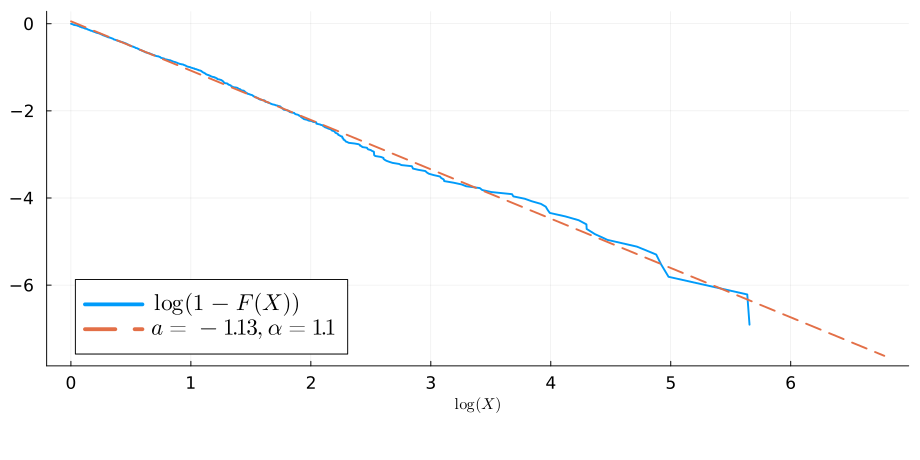

In [1]:
function simple_regression(x, y)
  x_bar = mean(x)
  y_bar = mean(y)
  a = sum((x .- x_bar).*(y .- y_bar)) / sum((x .- x_bar).^2)
  b = y_bar - a * x_bar
  return (;a, b)
end
N = 1000
alpha = 1.1
X = sort(rand(Pareto(alpha, 1.0), N))
F = (1:N) / N
y = log.(1 .- F)
x = log.(X)
(;a, b) = simple_regression(x[1:end-1], y[1:end-1])
plot(x, y; label = L"\log(1-F(X))", xlabel=L"\log(X)")
plot!(x, a*x .+ b; label = L"a=%$(round(a, digits = 2)), \alpha = %$alpha", style = :dash)

# Empirical Tails

## Empirical Evidence of Tails

-   It is sometimes difficult, with finite data, to distinguish between
    a heavy-tailed distribution and a then-tailed one
-   The issue is that in either case there are typically not that many
    observations with large values, even if there are more for
    power-laws.
-   Some classic examples of power-law tails in the data
    -   All from [Heavy-Tailed
        Distributions](https://intro.quantecon.org/heavy_tails.html) by
        Stachurski and Sargent

## Largest 500 firms in 2020 taken from Forbes Global 2000

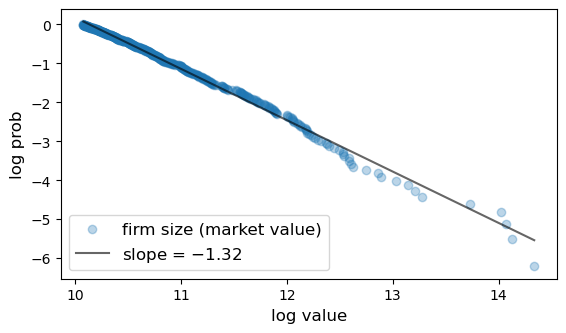

## City Sizes in the US and Brazil

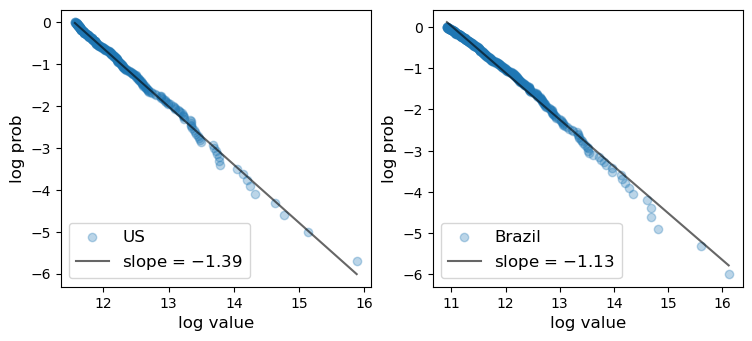

## Wealth Distribution Across Countries

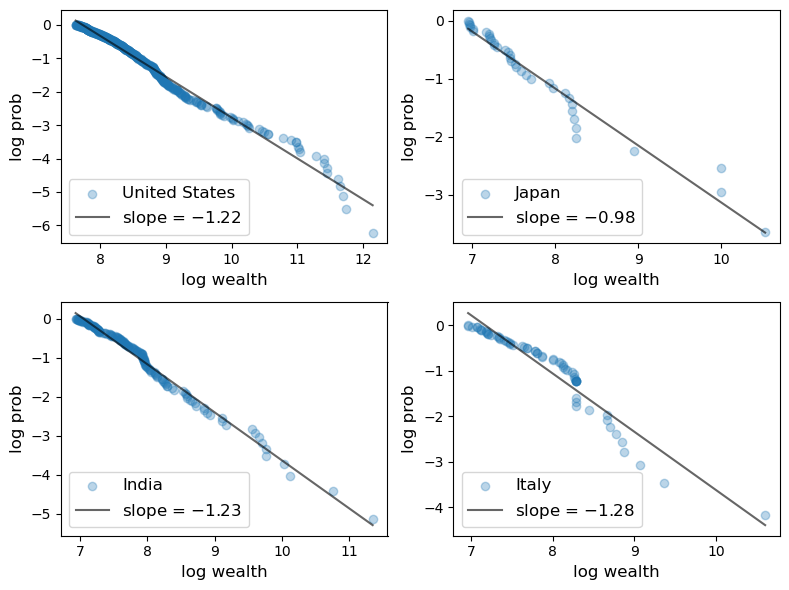

## GDP Across Countries

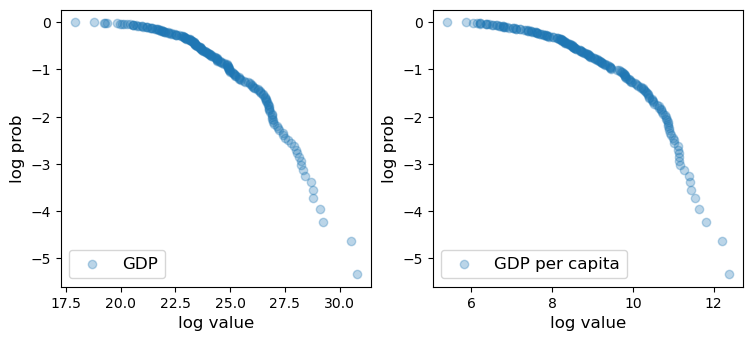

# Firm Dynamics

## Multiplicative Dynamics and Gibrat’s Law

-   [Gibrat’s Law](https://en.wikipedia.org/wiki/Gibrat%27s_law) is a
    simple model of firm dynamics which proposes that the growth rate of
    a firm is independent of its size
    -   Note, this is a “law” on the stochastic process, not the
        stationary distribution that comes out of it
    -   Can show that a proportional growth process will lead to a
        lognormal distribution of firm sizes over time
-   Does it hold in the data?
-   Not exactly, even if a good starting point (e.g.,[Gibrat’s
    Legacy](https://www.jstor.org/stable/2729692) by John Sutton)
    -   Small firms tend to grow faster than large firms
    -   Volatility is higher for small firms
    -   Rather than lognormal, seems closer to Zipfs law

## Zipf Distribution? $\alpha = 1.059$

<figure>
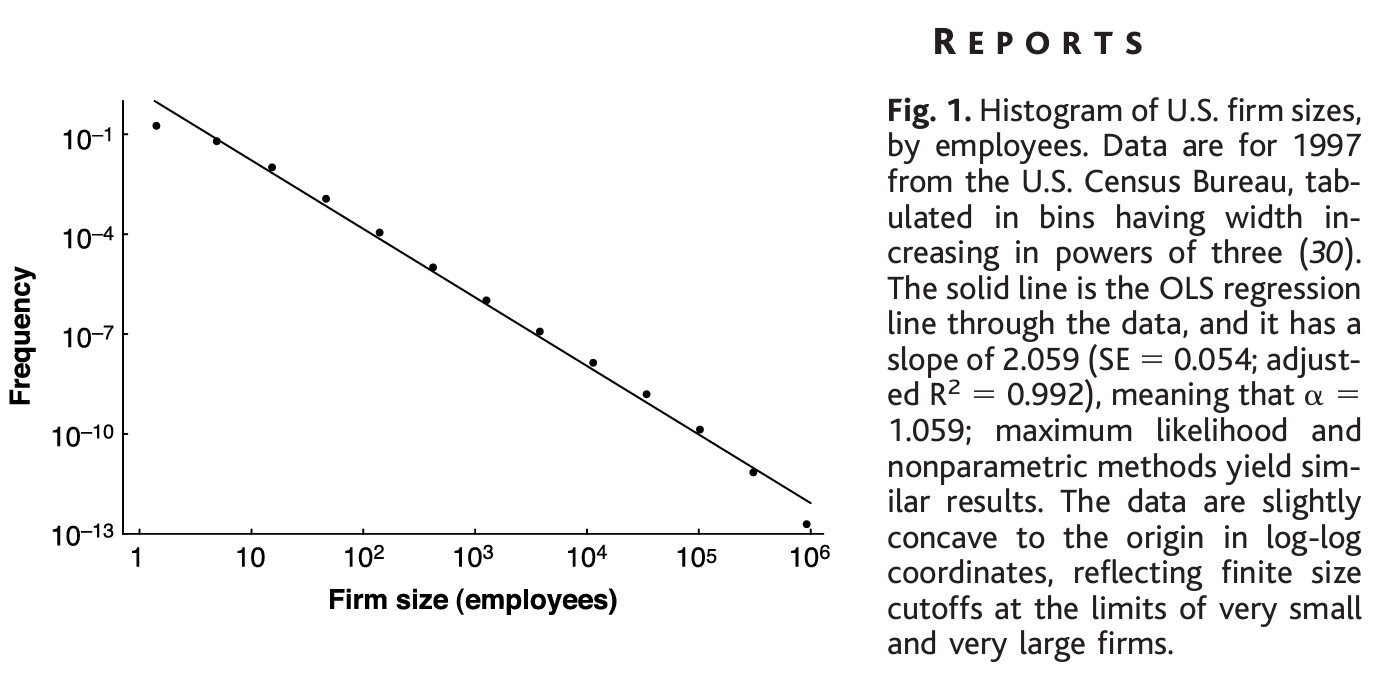
<figcaption aria-hidden="true">See
https://www.science.org/doi/10.1126/science.1062081 by
Axtell</figcaption>
</figure>

## Which of Stochastic Processes Lead to Power Laws?

-   [Zipf’s Law](https://en.wikipedia.org/wiki/Zipf%27s_law) is a type
    of distribution: The size of the $n$th largest is inversely
    proportional to $n$
    -   Equivalent to a discrete version of a Pareto distribution with
        $\alpha = 1$
-   [Power Laws in Economics and
    Finance](https://pages.stern.nyu.edu/~xgabaix/papers/pl-ar.pdf) by
    Xavier Gabaix is a good reference on Power laws and where they come
    from
-   The key: multiplicative growth processes + some distortion at the
    bottom of the distribution
    -   bankruptcy
    -   exit and entry
    -   additive shocks which distort the bottom disproportionately

## Reminder on Kesten Processes

-   Recall the **Kesten Process**, which generalizes this by adding in
    the $y_{t+1}$ term

    $$
    X_{t+1} = a_{t+1} X_t + y_{t+1}
    $$

    -   $a_{t+1}$ is an IID growth rate, $y_{t+1}$ is an IID additive
        shock

-   Another example of a related process

$$
  X_{t+1} = \max\{s_0, a_{t+1} X_t\}
  $$

## Simulation of a Process for Growth

-   Let firm size $X_{t+1} = \max\{s_0, a_{t+1} X_t\}$, where
    $\log a_{t+1} \sim \mathcal{N}(\mu, \sigma^2)$


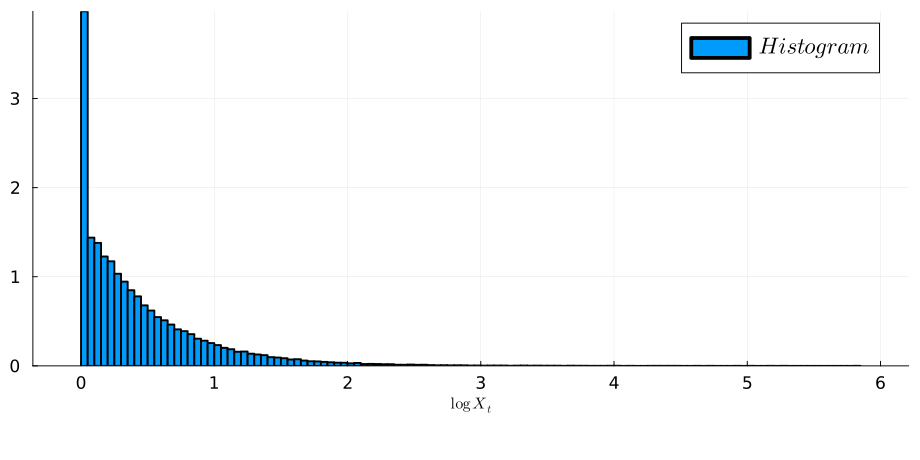

In [1]:
function iterate_map_iid_ensemble(f, dist, x0, T, num_samples)
    x = zeros(num_samples, T + 1)
    x[:, 1] .= x0
    for t in 2:(T + 1)
        x[:, t] .= f.(x[:, t - 1], rand(dist, num_samples))
    end
    return x
end
num_samples = 100000
T = 500
s_0 = 1.0 # exit/entry at X = 1.0
X_0 = 1.0
a_dist = LogNormal(-0.01, 0.1)
h(X, a) = max(s_0, a * X)
X = iterate_map_iid_ensemble(h, a_dist, X_0, T, num_samples)
histogram(log.(X[:, end]); label = L"Histogram", xlabel = L"\log X_t", normalized=true)

## Log-Log Plot


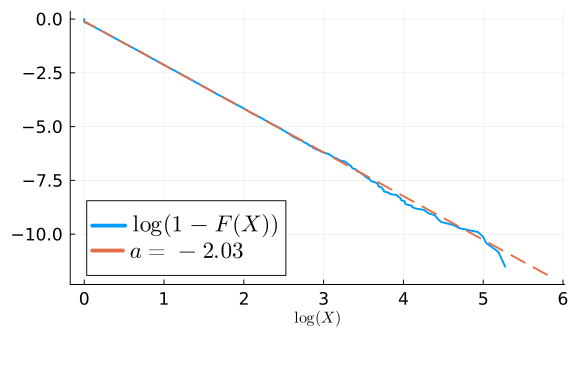

In [1]:
X_T = sort(X[:, end])
x_T = log.(X_T)
F_T = (1:length(X_T)) / length(X_T)
y_T = log.(1 .- F_T)
(;a, b) = simple_regression(x_T[1:end-1],
                            y_T[1:end-1])
plot(x_T, y_T; label = L"\log(1-F(X))",
     xlabel=L"\log(X)", size = (600, 400))
a_r = round(a, digits = 2)     
plot!(x_T, a*x_T .+ b;
      label = L"a=%$a_r", style = :dash)

# Lorenz Curves and Gini Coefficients

## Visualizing Inequality

-   Tails are helpful for seeing how inequality is distributed at the
    top-end (e.g., the top 1% or 0.1%)
    -   They can also help us understand processes which might generate
        inequality
    -   For example, Kesten processes, which we will come back to, are a
        class of processes which generate power-law tails
    -   This can influence tax policy/etc.
-   However, the tail behavior is not very useful to understand
    inequality in the lower parts of the distribution

## Lorenz Curves

-   One popular graphical measure of inequality is the [Lorenz
    curve](https://en.wikipedia.org/wiki/Lorenz_curve).
-   For a continuous distribution with pdf $f(x)$, cdf $F(x)$, and
    quantile $x = F^{-1}(p)\equiv Q(p)$

$$
L(p) = \frac{\int_{-\infty}^{Q(p)} x f(x) dx}{\int_{-\infty}^{\infty} x f(x) dx}
$$

-   Which can be rewritten as
    $L(p) = \frac{\int_{0}^{p} Q(s) ds}{\int_{0}^{1} Q(s) ds}$
-   Intuition: the proportion of the population with less than $p$ of
    the total income has $L(p)$ of the total income

## Lorenz Curve Given Data

-   In the case of [unweighted discrete
    data](https://en.wikipedia.org/wiki/Lorenz_curve#Definition_and_calculation)
    we have a simple empirical version of the Lorenz curve.
    [Weighted](https://en.wikipedia.org/wiki/Lorenz_curve#Definition_and_calculation)
    versions are useful if you bin data (e.g. quintiles)
-   Given **sorted** $v_1, \ldots v_n$, we find the empirical CDF
    (previous slides) is $F(v_i) \equiv F_i \equiv \frac{i}{n}$
-   The Lorenz curve is $$
    \begin{aligned}
    S_i &= \frac{1}{n}\sum_{j=1}^i v_j \\
    L_i &= \frac{S_i}{S_n}
    \end{aligned}
    $$

## Implementation


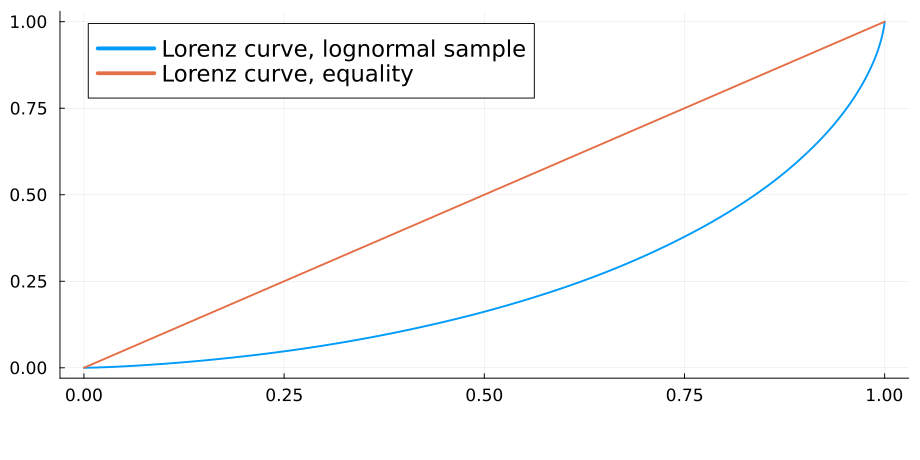

In [1]:
function lorenz(v)  # assumed sorted vector
    S = cumsum(v)  # cumulative sums: [v[1], v[1] + v[2], ... ]
    F = (1:length(v)) / length(v) # empirical CDF since everyone has the same weight!
    L = S ./ S[end]
    return (; F, L) # returns named tuple
end
n = 10_000
w = sort(exp.(randn(n)));  # lognormal draws
(; F, L) = lorenz(w)
plot(F, L, label = "Lorenz curve, lognormal sample", legend = :topleft)
plot!(F, F, label = "Lorenz curve, equality")

## With Cruder Samples Still Fairly Smooth


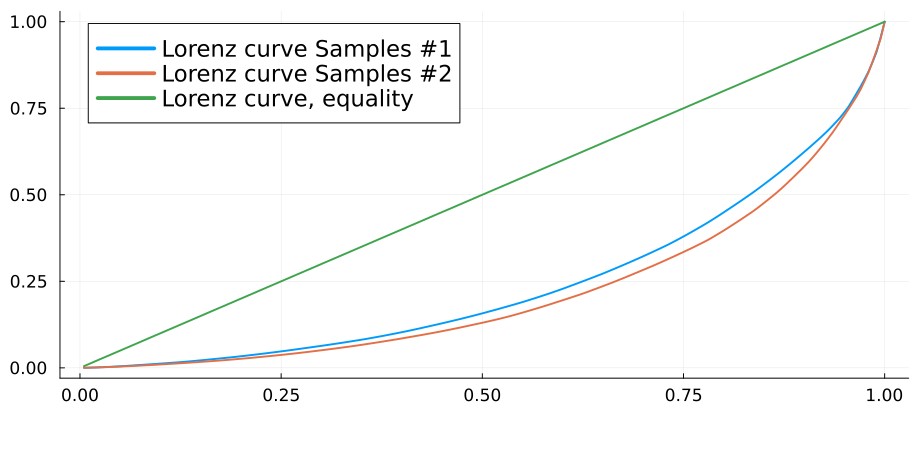

In [1]:
n = 200
w = sort(exp.(randn(n)));  # lognormal draws
(; F, L) = lorenz(w)
plot(F, L, label = "Lorenz curve Samples #1", legend = :topleft)
w = sort(exp.(randn(n)));  # lognormal draws
(; F, L) = lorenz(w)
plot!(F, L, label = "Lorenz curve Samples #2")
plot!(F, F, label = "Lorenz curve, equality")

## Interpretation

-   if point $(x,y)$ lies on the curve, it means that, collectively, the
    bottom $(100x)\%$ of the population holds $(100y)\%$ of the wealth.
-   The “equality” line is the 45 degree line, i.e. the Lorenz curve
    under perfect equality.
-   In this example, the bottom 80% of the population holds around 40%
    of total wealth.

## Lorenz Curve for Pareto

-   Can verify analytically that $L(p) = 1 - (1- p)^{1 - 1/\alpha}$ for
    the Pareto distribution


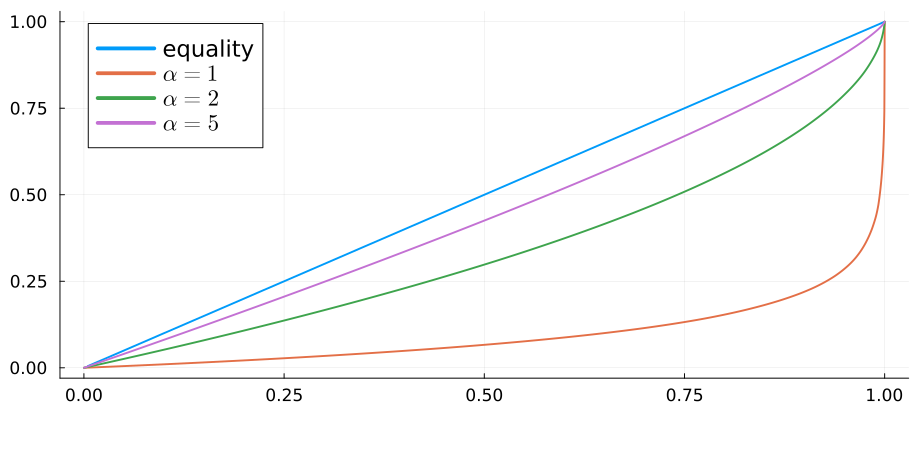

In [1]:
a_vals = (1, 2, 5)
n = 10_000
plt = plot(F, F, label = "equality", legend = :topleft)
for a in a_vals
    u = rand(n)
    y = sort(rand(Pareto(a, 1.0), n))
    (; F, L) = lorenz(y)
    plot!(plt, F, L, label = L"\alpha = %$a")
end
plt

## Gini Coefficients

-   The [Gini
    Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) is a
    summary measure of the Lorenz curve
    -   Integral between the Lorenz curve and the line of equality
    -   Gini is zero with no inequality, and one if concentrated in
        single individual
-   With sorted, unweighted discrete set $\{v_1,\ldots v_n\}$ there is a
    [simplification](https://en.wikipedia.org/wiki/Gini_coefficient#Alternative_expressions)

$$
G = \frac{2\sum_{i=1}^n i v_i}{n \sum_{i=1}^n v_i} - \frac{n+1}{n}
$$

## Calculation and Comparison to Theoretical

-   The [Weibull
    distribution](https://en.wikipedia.org/wiki/Weibull_distribution),
    $f(x) = a x^{a-1} e^{-x^a}$, has a Gini coefficient of $1 - 2^{1/a}$


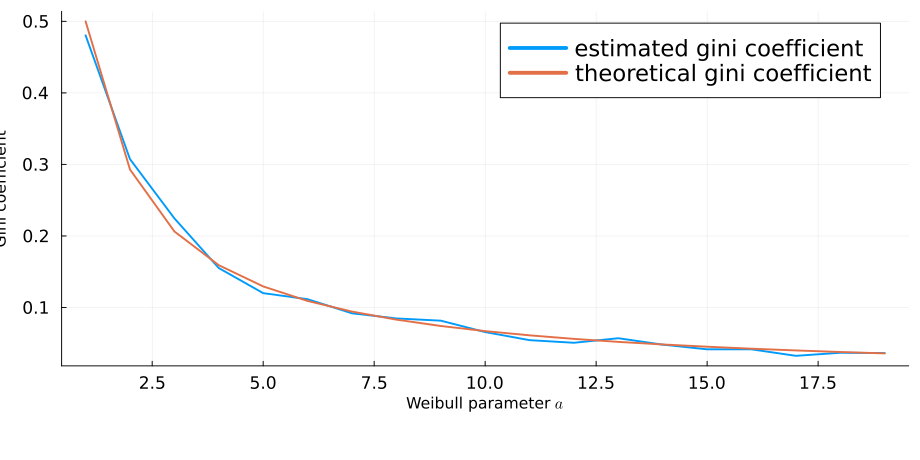

In [1]:
function gini(v)
    return (2 * sum(i * y for (i, y) in enumerate(v)) / sum(v)
           - (length(v) + 1)) / length(v)
end

a_vals = 1:19
n = 100
ginis = [gini(sort(rand(Weibull(a), n))) for a in a_vals]
ginis_theoretical = [1 - 2^(-1 / a) for a in a_vals]

plot(a_vals, ginis, label = "estimated gini coefficient",
     xlabel = L"Weibull parameter $a$", ylabel = "Gini coefficient")
plot!(a_vals, ginis_theoretical, label = "theoretical gini coefficient")

# Wealth and Income Distribution

## Income and Wealth

-   The degree of inequality in income and wealth can be very different
    -   Income is a flow variable, wealth is a stock variable
    -   Income is taxed progressively
    -   Wealth is taxed proportionally in order to avoid double taxation
        (i.e., in principle, income was already taxed before purchasing
        assets)
    -   Different rates of return for different types of assets
    -   Inheritance of wealth vs. human capital
-   Some data sources: [World Inequality Database](https://wid.world/),
    [Our World in Data](https://ourworldindata.org/), [Stone
    Foundation](https://www.stonefdn.org/about) and many OECD/Fed
    sources
-   Theory Survey: [Skewed Wealth Distributions: Theory and Empirics by
    Benhabib and
    Bisin](https://www.aeaweb.org/articles?id=10.1257/jel.20161390)

## Measurement Issues

-   Measurement and interpretation is tricky for both
-   Panel data used by economists
    (e.g. [PSID](https://psidonline.isr.umich.edu/) and [Survey of
    Consumer
    Finances](https://www.federalreserve.gov/econres/scfindex.htm)), but
    have difficulty sampling the rich
-   Administrative data (e.g., social security records) help for income
    but not so much for wealth
-   In many economies, a significant portion of wealth is in social
    security promises for many people.
    -   e.g., if we taxed everyone at 90% and used all of that for
        public pensions, then only calculating wealth from assets would
        be misleading
    -   How to handle the “zeros”? Maybe gini isn’t ideal for wealth
-   Mapping from wealth/income to consumption (and ultimately welfare)?

------------------------------------------------------------------------

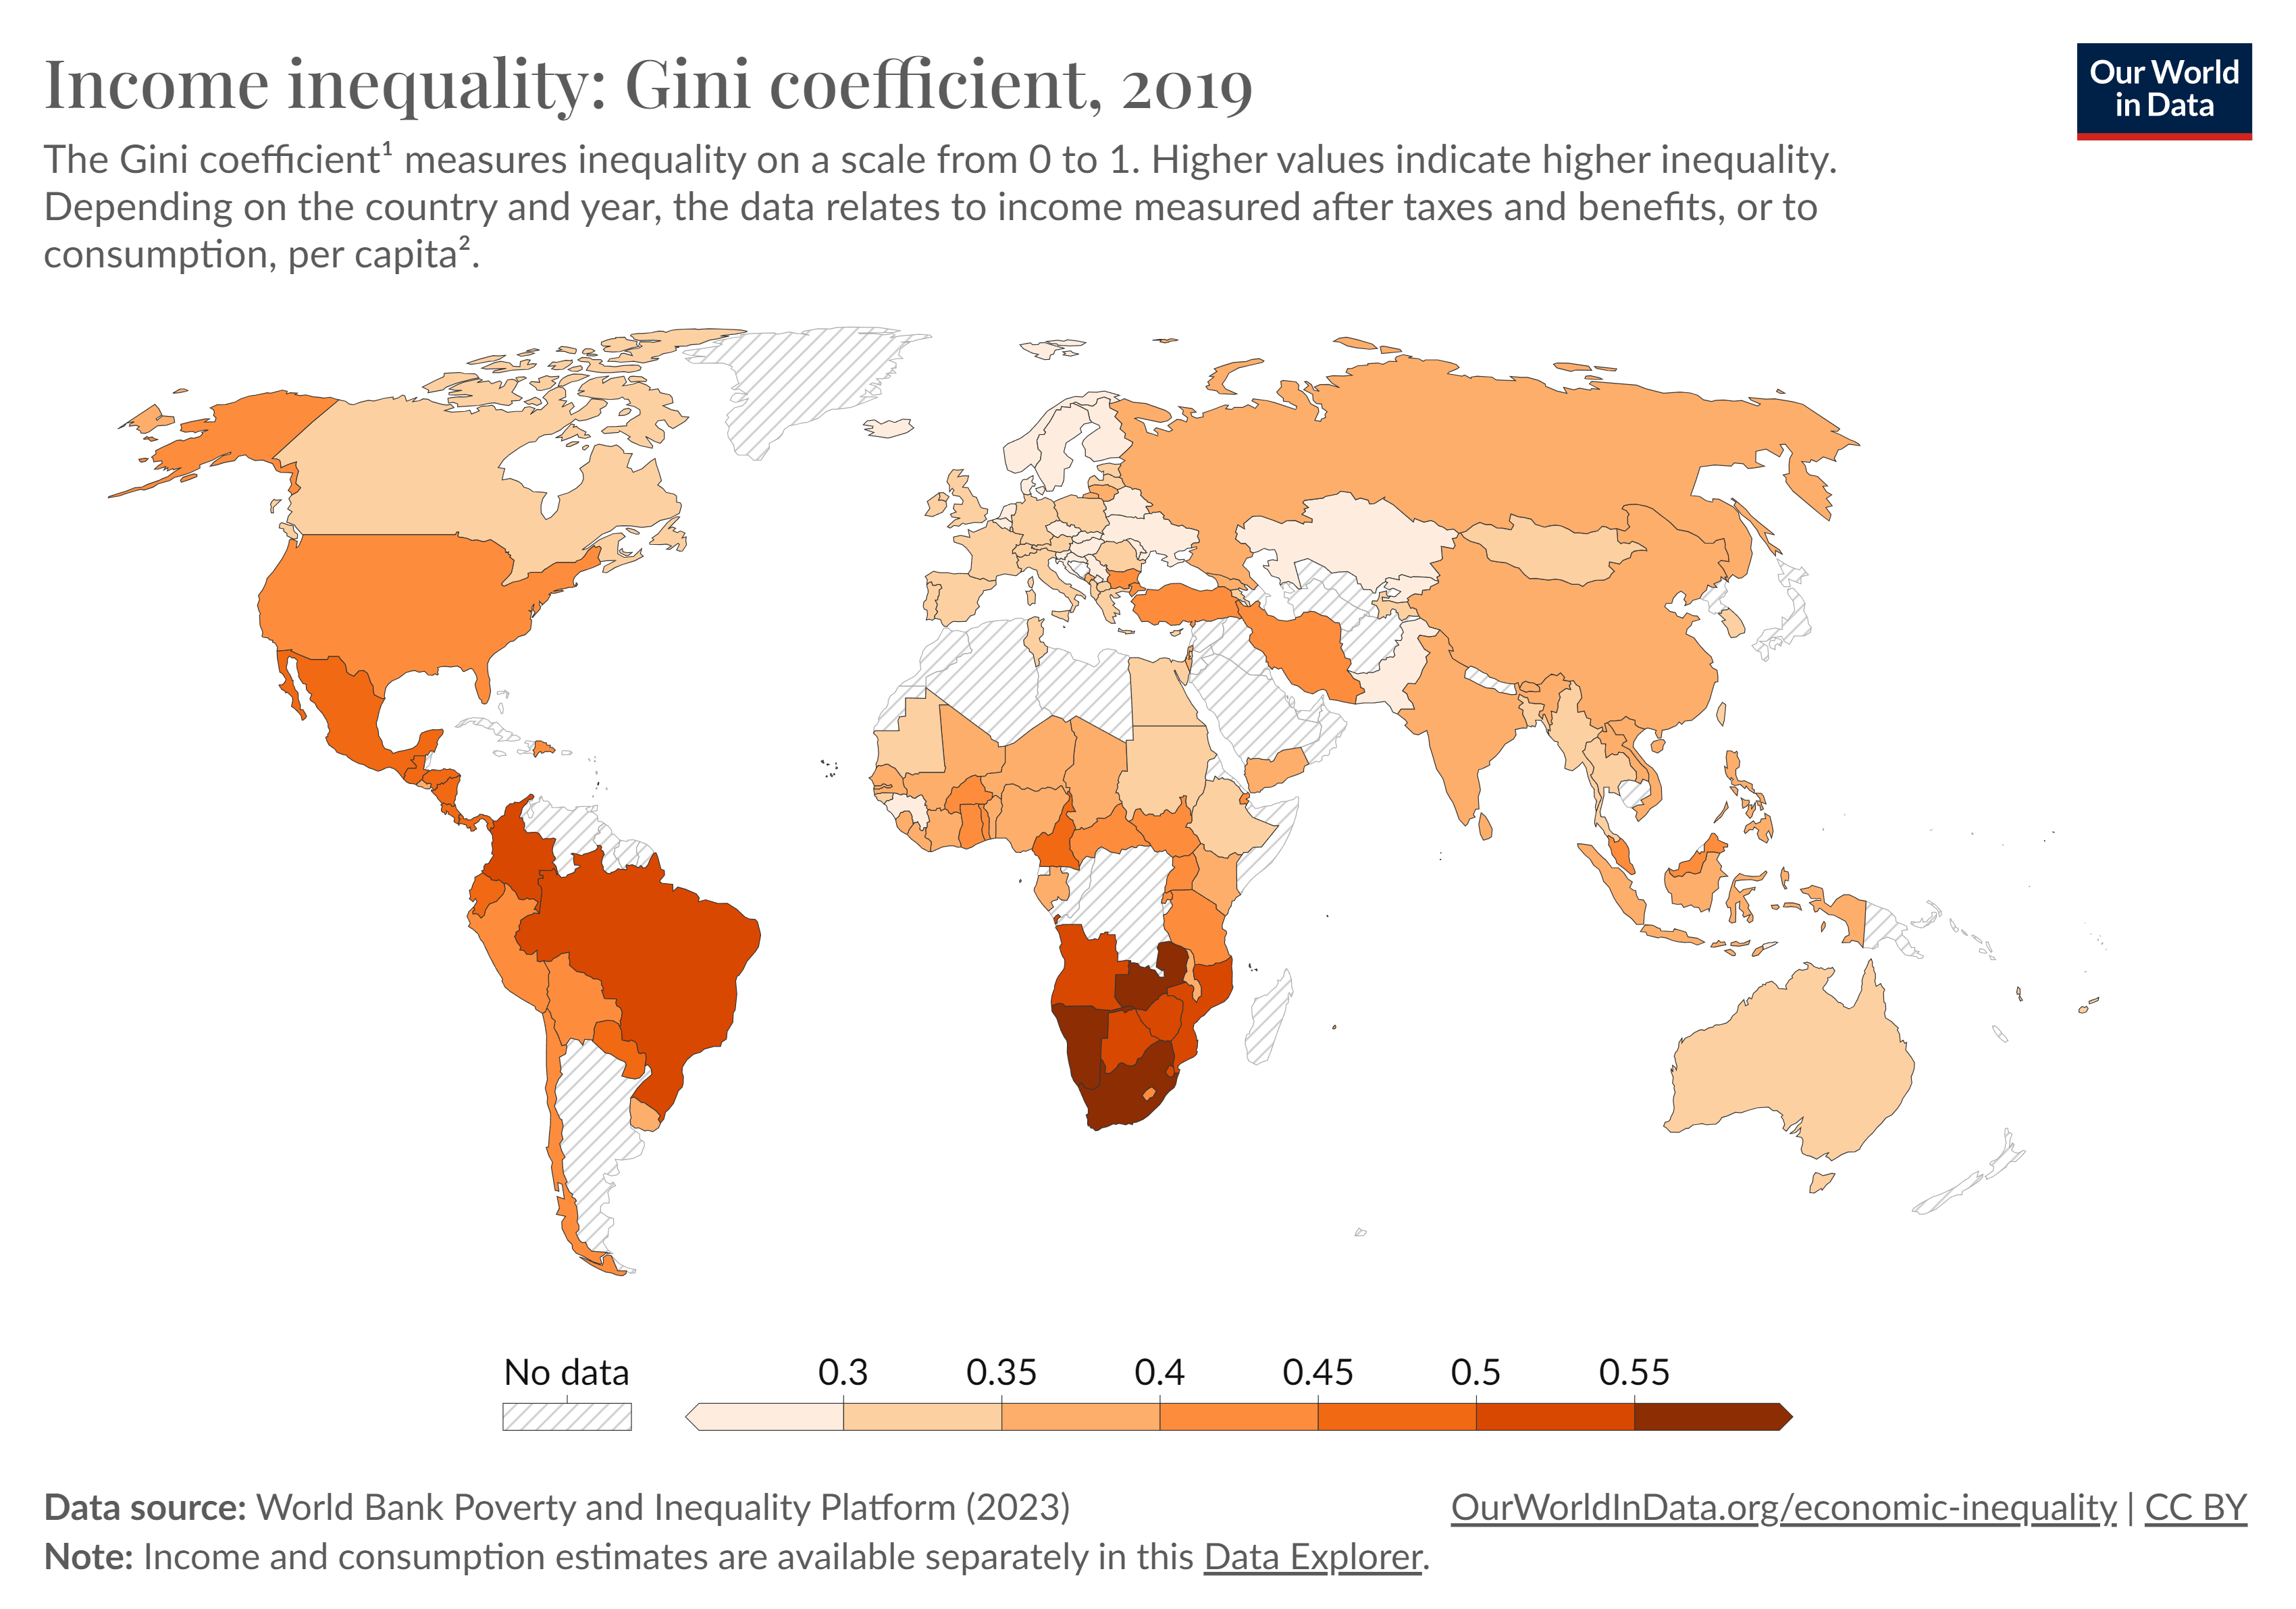

------------------------------------------------------------------------

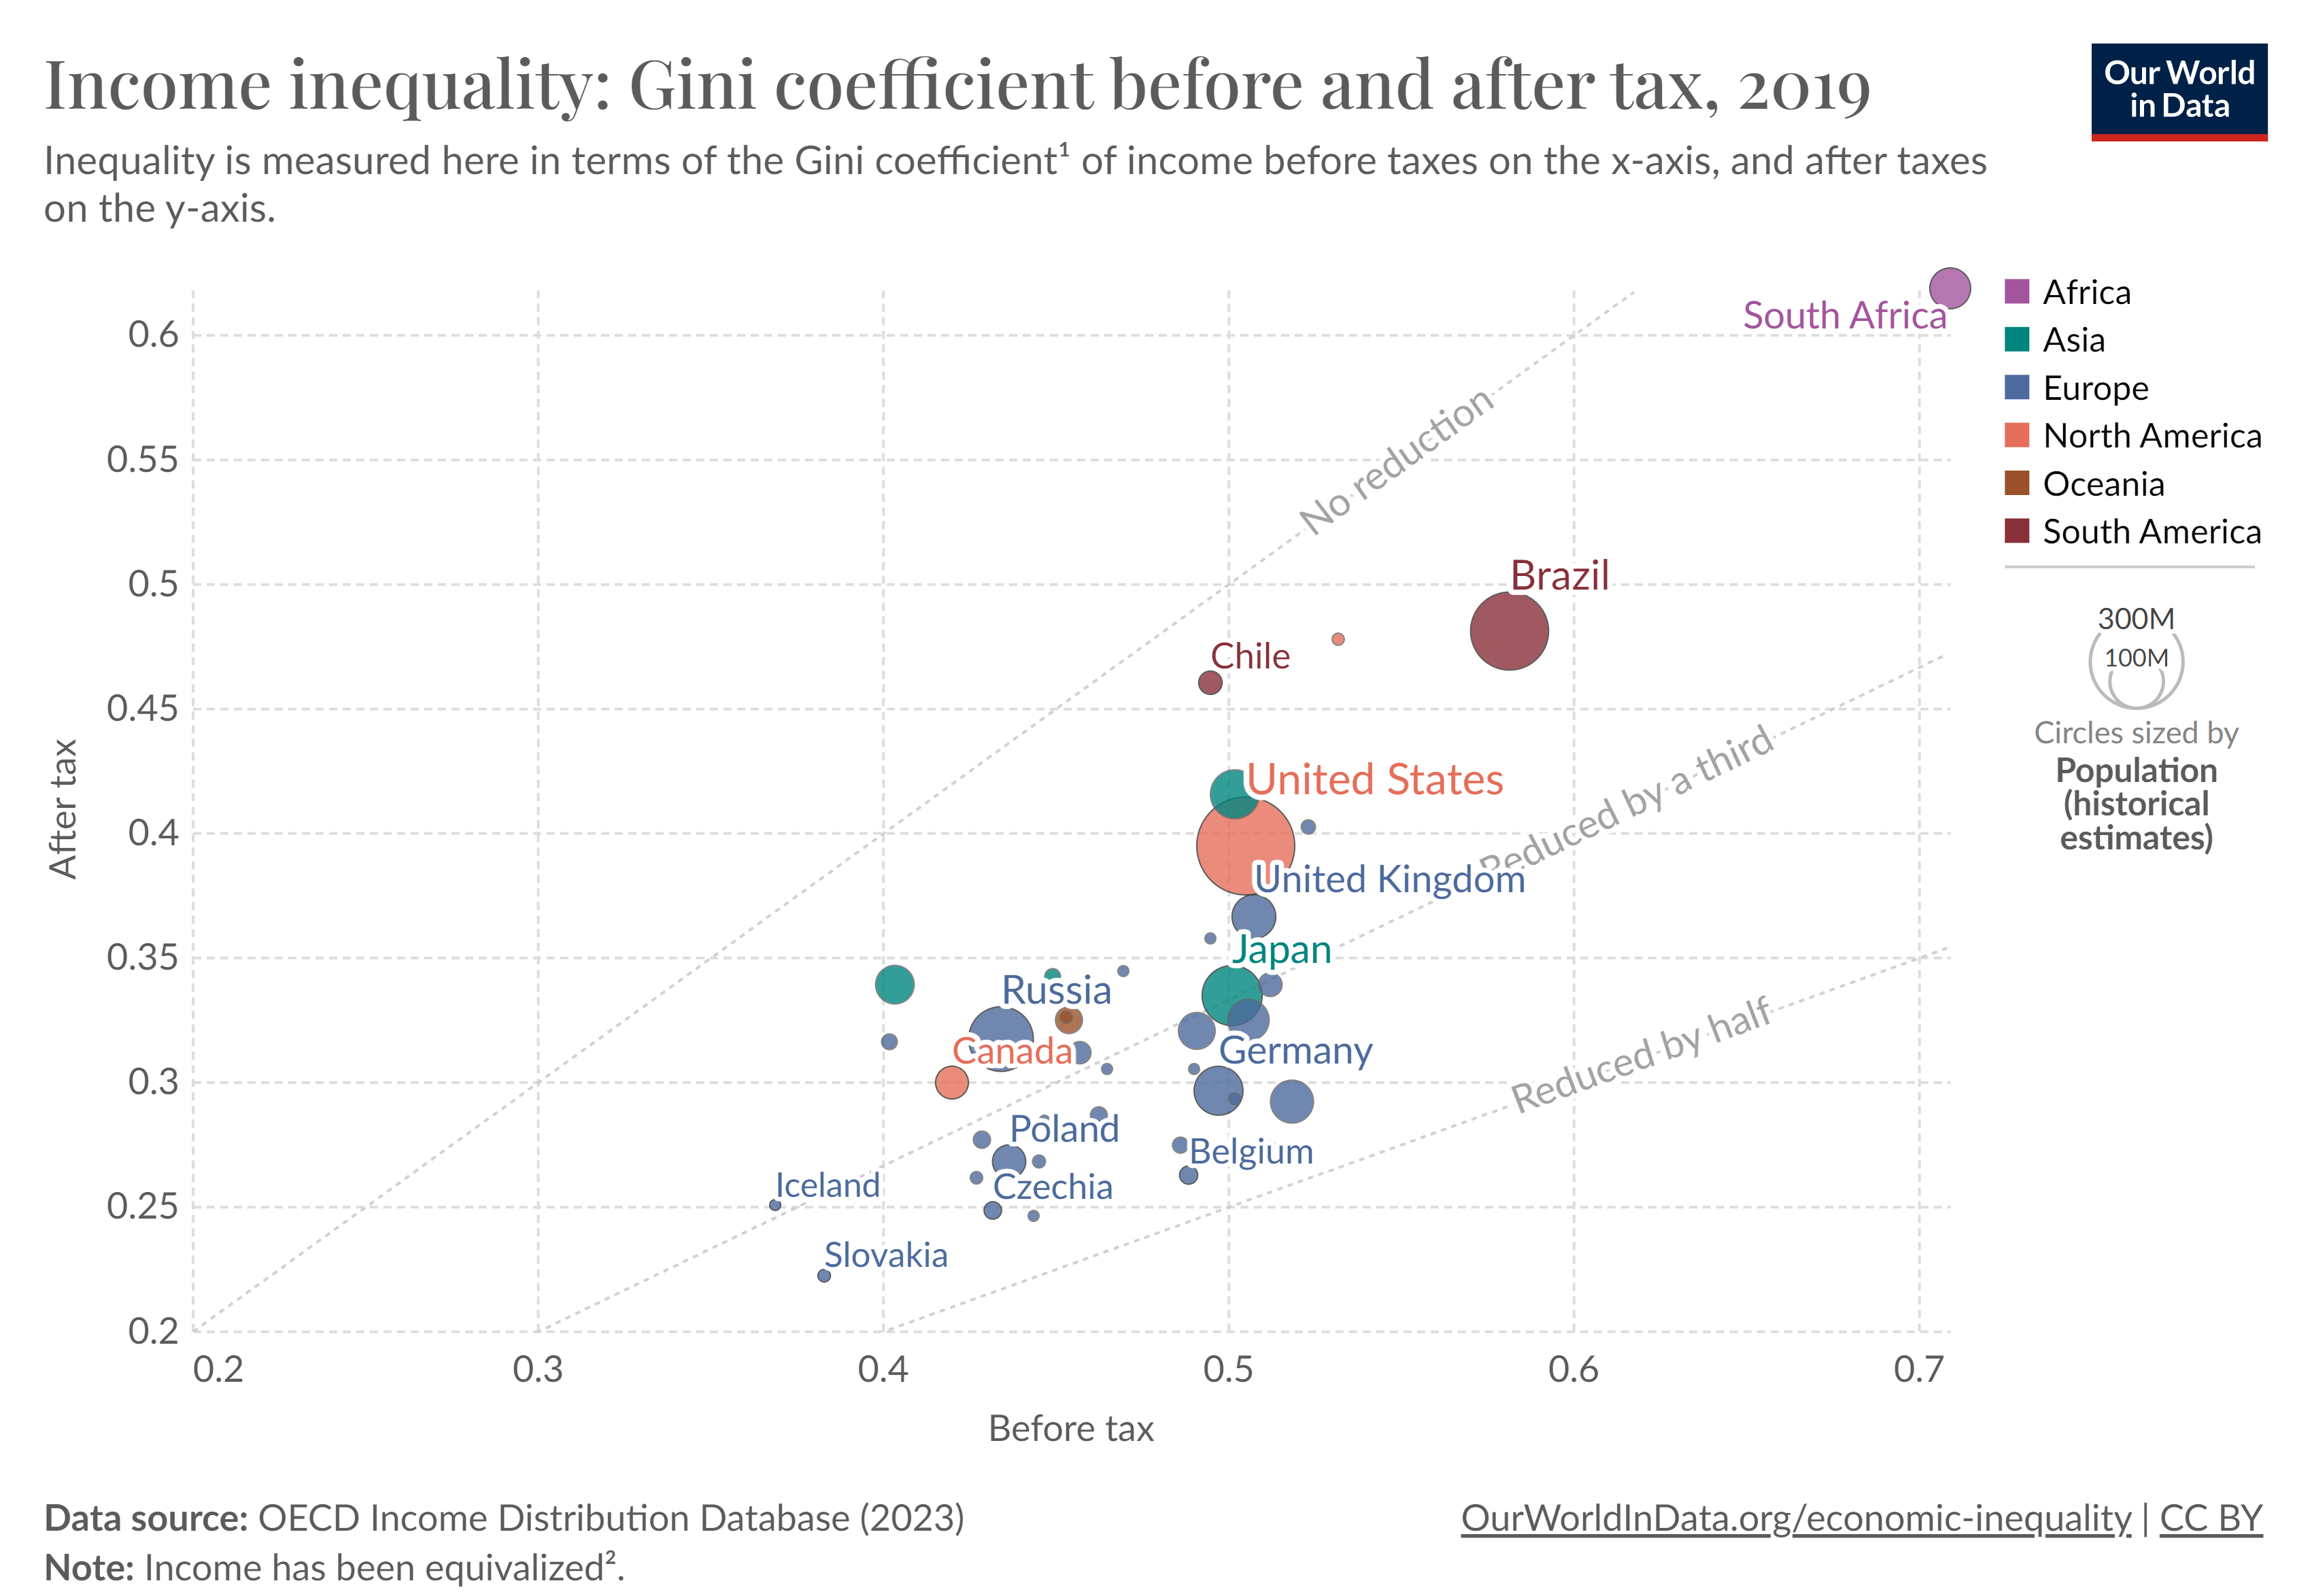

## From [From Benhabib, Bisin, Luo](https://pubs.aeaweb.org/doi/pdfplus/10.1257/aer.p20171005)

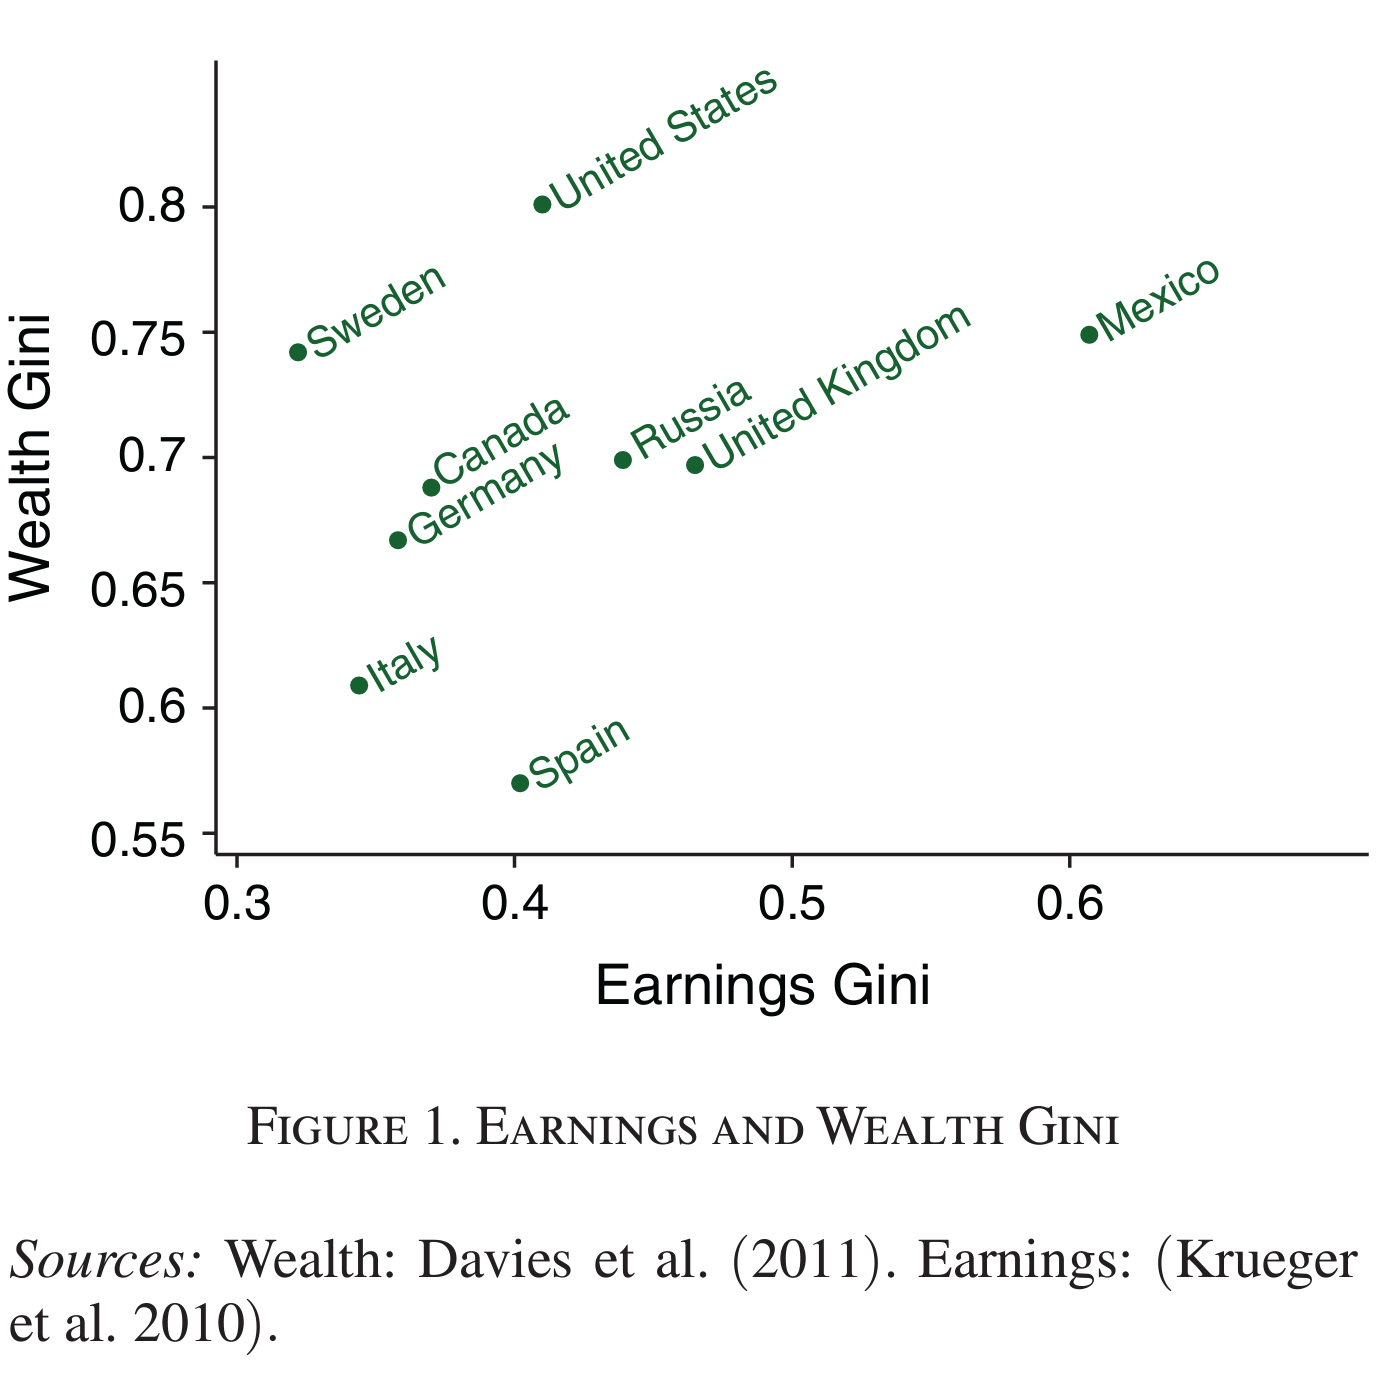

## Cross-Country Comparisons

-   Useful to compare and pool across countries, but can be misleading
    in interpretation
-   Income/wealth/etc. comes out of various stochastic processes,
    government interventions, and individual choices
-   Hypotheticals can be helpful to think things through
    -   If we made Canadians 5x more productive proportionality,
        preserving Canada’s gini how would it change these global
        measures?
    -   If we magically made India have the same income distribution as
        the US, how much would that change the global Gini?

------------------------------------------------------------------------

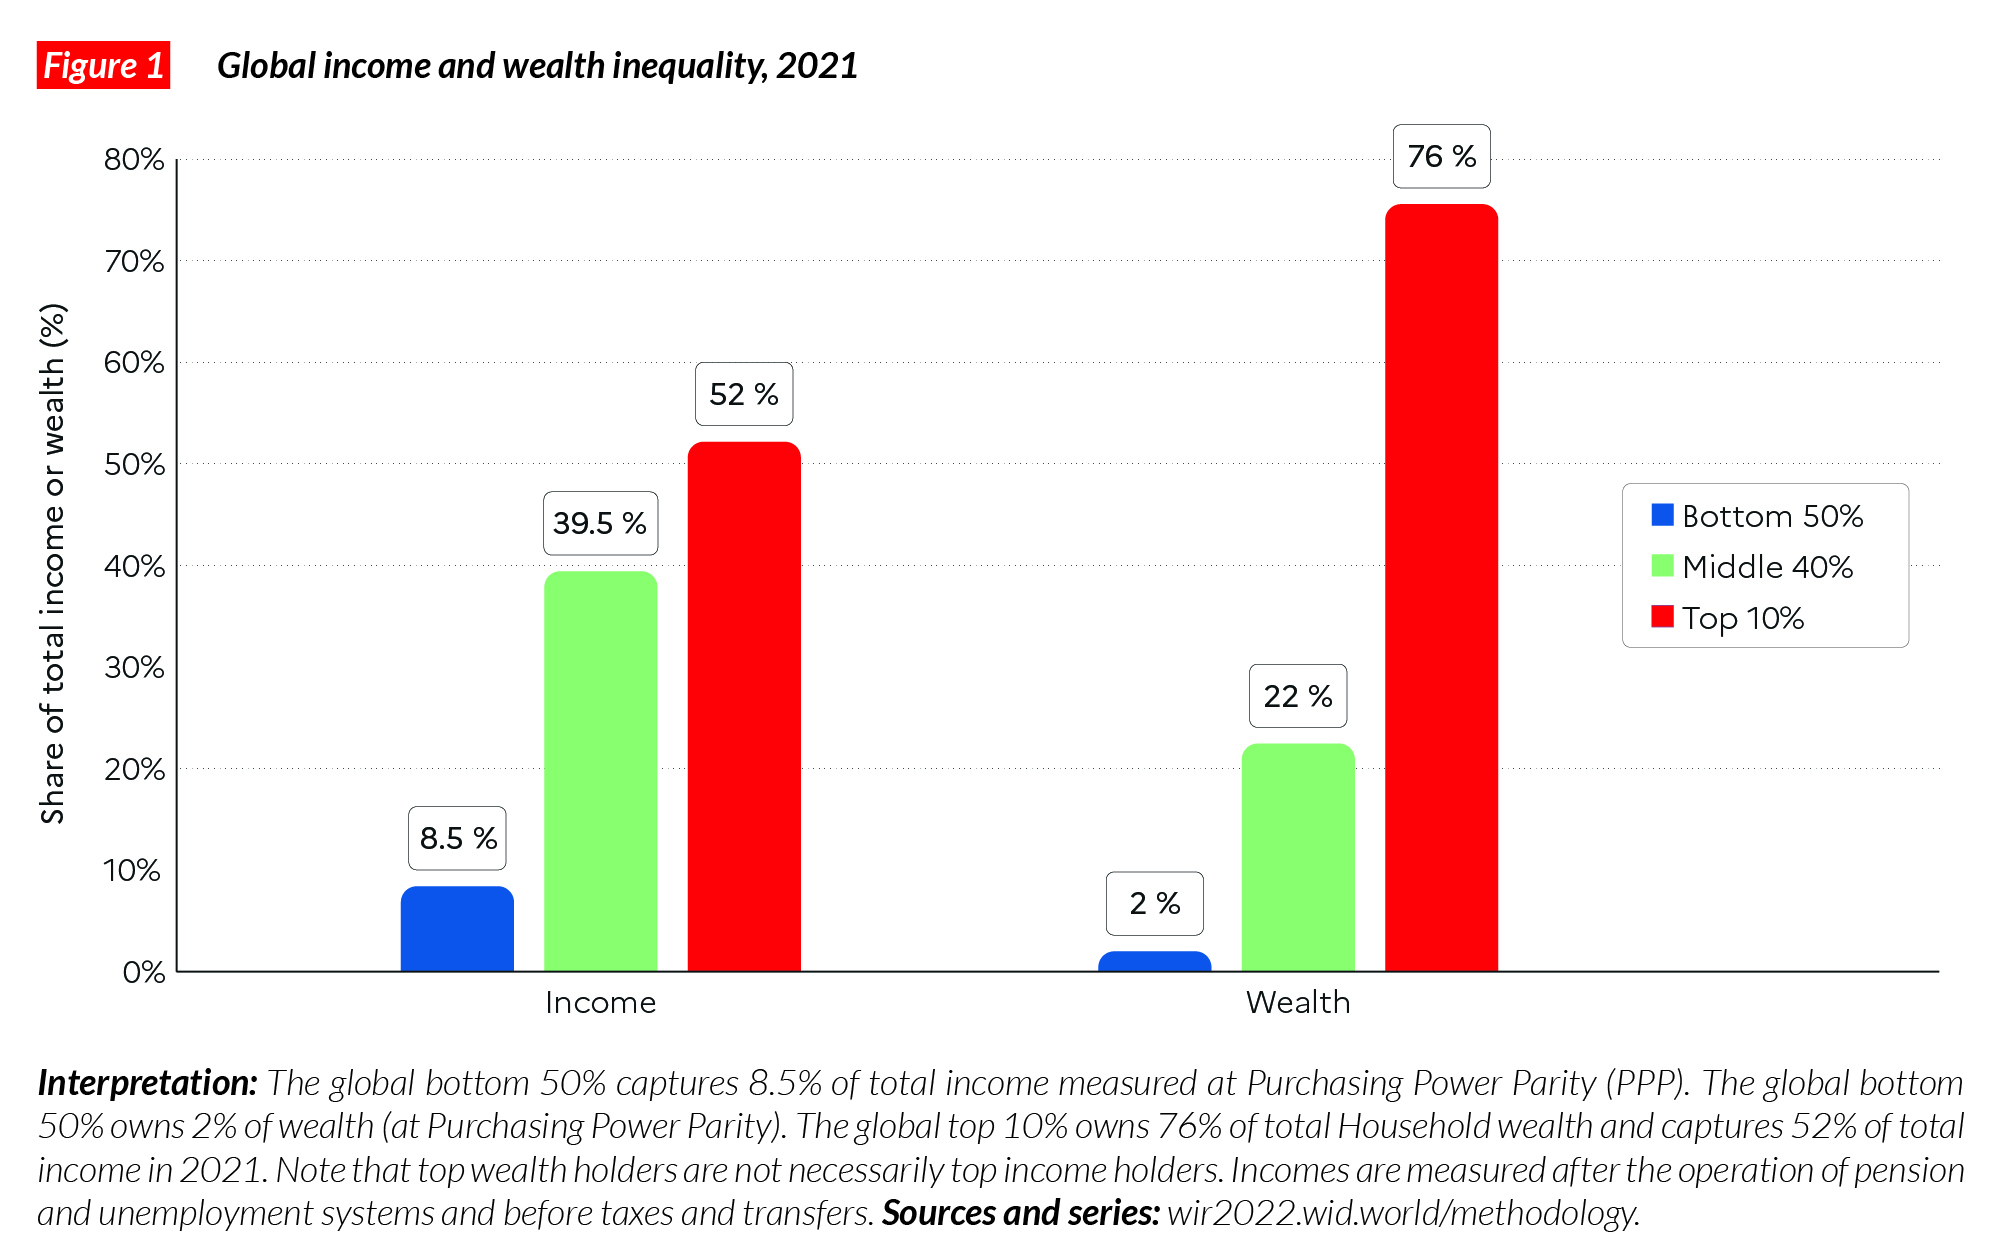

------------------------------------------------------------------------

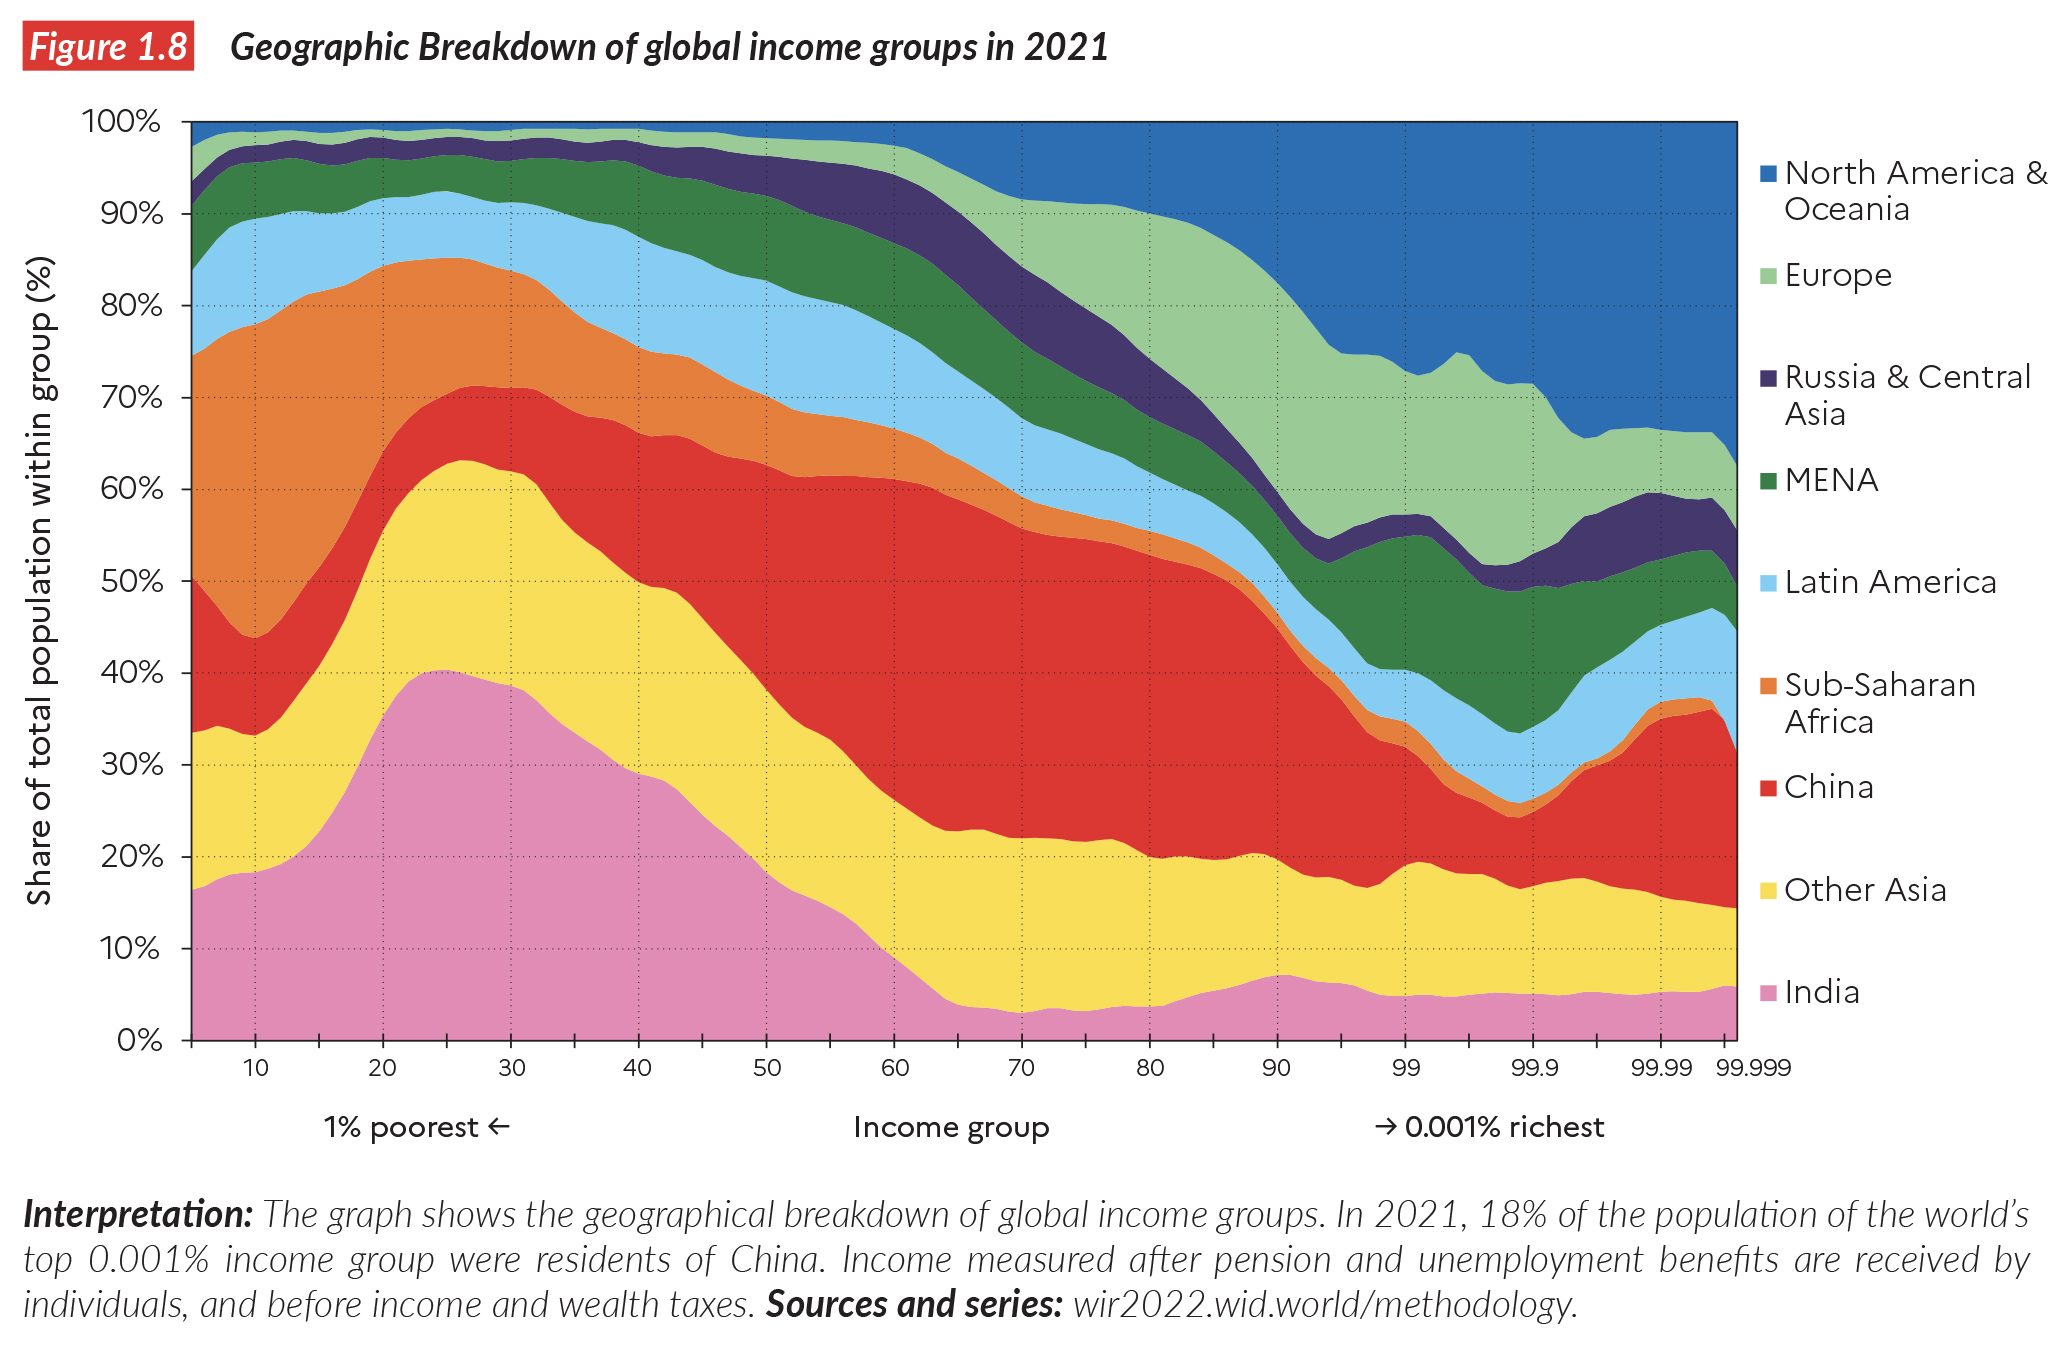

# Wealth Dynamics

## Wealth Dynamics

-   Theory tells us that Kesten processes will lead to power-law tails
    and hence typically high degrees of inequality
-   Income inequality itself can also be skewed
    -   It is sometimes a power-law but unlikely to be due to
        Kesten-style dynamics because human capital doesn’t seem
        multiplicative
    -   However, complementarities in production can take small
        differences in talent and amplify them
    -   e.g., see [Why has CEO Pay Increased So Much by Gabaix and
        Landier](https://scholar.harvard.edu/sites/scholar.harvard.edu/files/xgabaix/files/why_has_ceo_pay_increased.pdf)
-   Here we will explore additive income + Kesten-style dynamics of
    wealth

## Key Components of Wealth Dynamics

-   Income will follow simple auto-regressive style
-   Returns on wealth will have an IID component and be multiplicative
-   Savings will be a a portion of wealth, as in previous models
    -   Assume they only save if the wealth is above a certain level
    -   This is a simple way to model that many people do not save
-   Our prediction is that this distortion at the bottom of the
    distribution leads to power-law tails

## Savings and Wealth Process

-   $w_t$ is wealth

-   Stochastic variables, which may have an underlying state

    -   $y_t$ is income, which will be stochastic
    -   $R_{t+1}$ is the gross return on wealth, which will be
        stochastic

-   The total income saved is an exogenous $s(w_t)$. Consumption implied

    $$
    w_{t+1} = R_{t+1}s(w_t) + y_{t+1}
    $$

-   Wealth net of consumption, $s(w_t)$, is a simple threshold

    $$
     s(w_t) = \begin{cases} s_0 w_t & \text{if } w_t > \hat{w}\\
     0 & \text{otherwise}\end{cases}
     $$

## Income and Returns Processes

-   We will introduce a correlation between income and returns based on
    an underlying state

    $$
    z_{t+1} = a z_t + b + \sigma_z \epsilon_{t+1}
    $$

-   Given this latent state the returns have IID shocks

    $$
    R_t := 1 + r_t = c_r \exp(z_t) + \exp(\mu_r + \sigma_r \xi_t)
    $$

-   And income has a similar IID component

    $$
    y_t = c_y \exp(z_t) + \exp(\mu_y + \sigma_y \zeta_t)
    $$

-   Where $\epsilon_t, \xi_t, \zeta_t$ are IID and standard normal

## Creation of Model Parameters

In [1]:
function wealth_dynamics_model(; # all named arguments
                               w_hat = 1.0, s_0 = 0.75, # savings
                               c_y = 1.0, mu_y = 1.0, sigma_y = 0.2, # labor income
                               c_r = 0.05, mu_r = 0.1, sigma_r = 0.5, # rate of return
                               a = 0.5, b = 0.0, sigma_z = 0.1)
    z_mean = b / (1 - a)
    z_var = sigma_z^2 / (1 - a^2)
    exp_z_mean = exp(z_mean + z_var / 2)
    R_mean = c_r * exp_z_mean + exp(mu_r + sigma_r^2 / 2)
    y_mean = c_y * exp_z_mean + exp(mu_y + sigma_y^2 / 2)
    alpha = R_mean * s_0
    z_stationary_dist = Normal(z_mean, sqrt(z_var))
    @assert alpha <= 1 # check stability condition that wealth does not diverge
    return (; w_hat, s_0, c_y, mu_y, sigma_y, c_r, mu_r, sigma_r, a, b, sigma_z,
            z_mean, z_var, z_stationary_dist, exp_z_mean, R_mean, y_mean, alpha)
end

## Simulation of an Agent

In [1]:
function simulate_wealth_dynamics(w_0, z_0, T, params)
    (; w_hat, s_0, c_y, mu_y, sigma_y, c_r, mu_r, sigma_r, a, b, sigma_z) = params # unpack
    w = zeros(T + 1)
    z = zeros(T + 1)
    w[1] = w_0
    z[1] = z_0
    for t in 2:(T + 1)
        z[t] = a * z[t - 1] + b + sigma_z * randn()
        y = c_y * exp(z[t]) + exp(mu_y + sigma_y * randn())
        w[t] = y # income goes to next periods wealth
        if w[t - 1] >= w_hat # if above minimum wealth level, add savings
            R = c_r * exp(z[t]) + exp(mu_r + sigma_r * randn())
            w[t] += R * s_0 * w[t - 1]
        end
    end
    return w, z
end

## Example Simulation


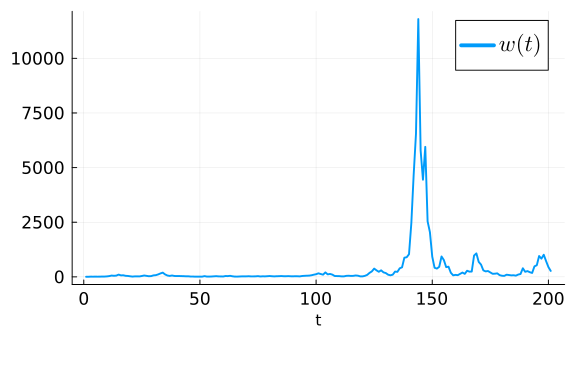

In [1]:
p = wealth_dynamics_model() # defaults
y_0 = p.y_mean
z_0 = rand(p.z_stationary_dist)
T = 200
w, z = simulate_wealth_dynamics(y_0, z_0, T, p)
plot(w, caption = "Wealth simulation",
        xlabel = "t", label = L"w(t)",
        size = (600, 400))

## Ternary Operator

In [1]:
function f1(x)
    val = 2.0
    if x >= 0.0
        val += x
    else
        val -= x
    end
    return val
end
function f2(x)
    temp = (x >= 0.0) ? x : -x
    return 2.0 + temp
end
f3(x) = 2.0 + ((x >= 0.0) ? x : -x)
@show f1(0.8), f2(0.8), f3(0.8)
@show f1(1.8), f2(1.8), f3(1.8);

(f1(0.8), f2(0.8), f3(0.8)) = (2.8, 2.8, 2.8)
(f1(1.8), f2(1.8), f3(1.8)) = (3.8, 3.8, 3.8)

## Simulate Panel with Ensemble

In [1]:
function simulate_panel(N, T, p)
    (; w_hat, s_0, c_y, mu_y, sigma_y, c_r, mu_r, sigma_r, a, b, sigma_z) = p
    w = p.y_mean * ones(N) # start at the mean of y
    z = rand(p.z_stationary_dist, N)
    zp = similar(z)
    wp = similar(w)
    R = similar(w)
    for t in 1:T
        z_shock = randn(N)
        R_shock = randn(N)
        w_shock = randn(N)
        @inbounds for i in 1:N
            zp[i] = a * z[i] + b + sigma_z * z_shock[i]
            R[i] = (w[i] >= w_hat) ? c_r * exp(zp[i]) + exp(mu_r + sigma_r * R_shock[i]) : 0.0
            wp[i] = c_y * exp(zp[i]) + exp(mu_y + sigma_y * w_shock[i]) + R[i] * s_0 * w[i]
        end
        w .= wp
        z .= zp
    end
    sort!(w) # sorts the wealth so we can calculate gini/lorenz        
    F, L = lorenz(w)
    return (; w, F, L, gini = gini(w))
end

## Gini and median Wealth

In [1]:
p = wealth_dynamics_model()
N = 10_000
T = 500
res = simulate_panel(N, T, p)
@show median(res.w)
@show res.gini;

median(res.w) = 38.34755616309111
res.gini = 0.7412705799338172

## Lorenz Curves and Returns on Wealth


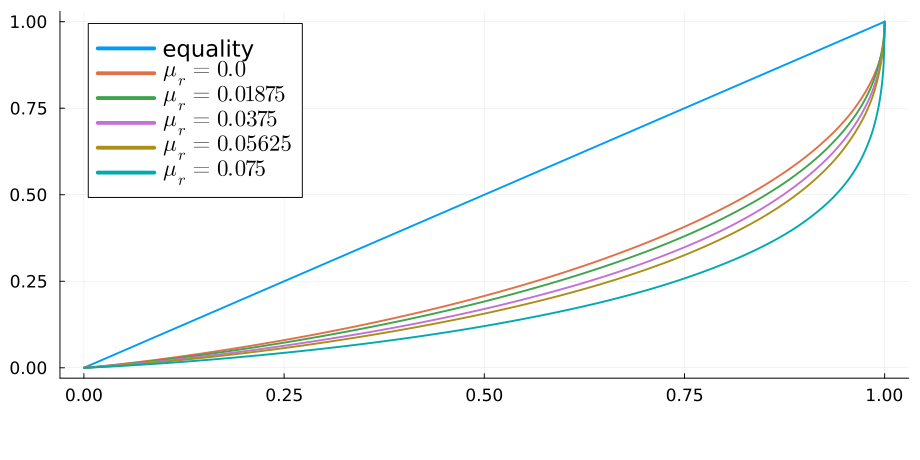

In [1]:
mu_r_vals = range(0.0, 0.075, 5)
results = map(mu_r -> simulate_panel(N, T, wealth_dynamics_model(; mu_r)),
              mu_r_vals);
plt = plot(results[1].F, results[1].F, label = "equality", legend = :topleft)
[plot!(plt, res.F, res.L, label = L"\mu_r = %$mu_r")
 for (mu_r, res) in zip(mu_r_vals, results)]
plt

## Gini Coefficients


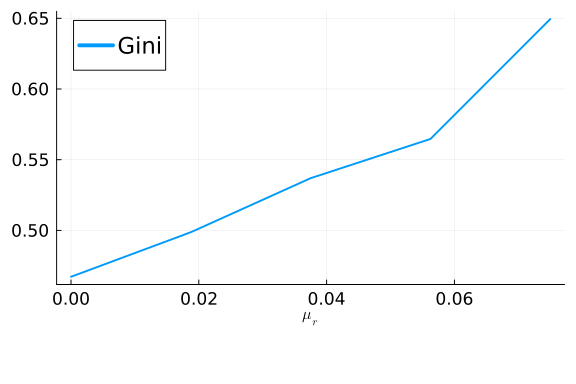

In [1]:
ginis = [res.gini for res in results]
plot(mu_r_vals, ginis;
    label = "Gini", xlabel = L"\mu_r",
    size = (600, 400))

## Lorenz Curves and Volatility


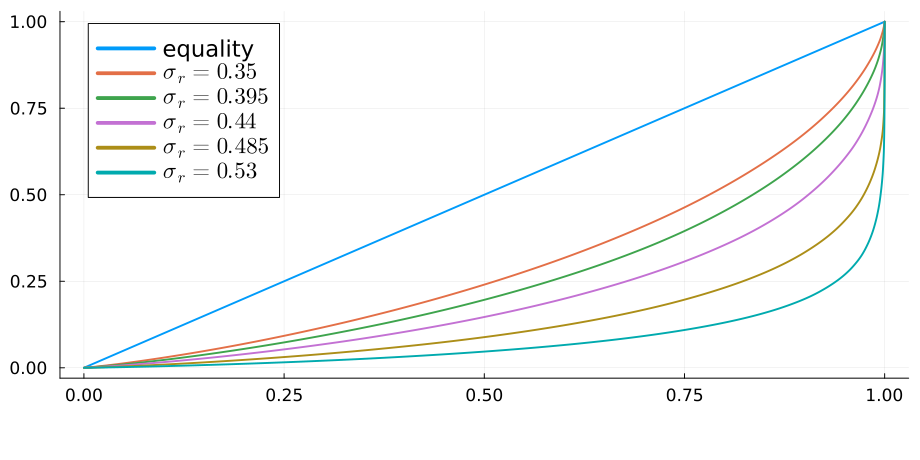

In [1]:
sigma_r_vals = range(0.35, 0.53, 5)
results = map(sigma_r -> simulate_panel(N, T, wealth_dynamics_model(; sigma_r)),
              sigma_r_vals);
plt = plot(results[1].F, results[1].F, label = "equality", legend = :topleft)
[plot!(plt, res.F, res.L, label = L"\sigma_r = %$sigma_r")
 for (sigma_r, res) in zip(sigma_r_vals, results)]
plt

## Gini Coefficients


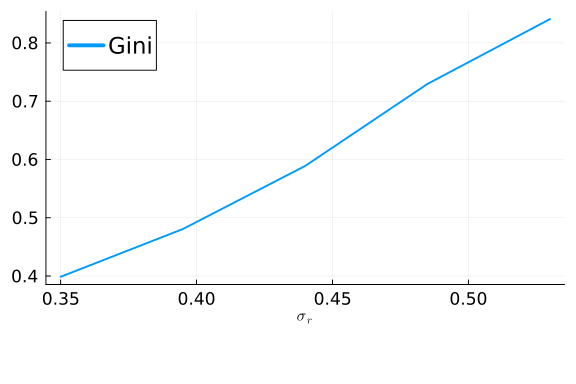

In [1]:
ginis = [res.gini for res in results]
plot(sigma_r_vals, ginis;
    label = "Gini", xlabel = L"\sigma_r",
    size = (600, 400))

# (Optional) Benchmarking Examples

## In-place Functions, Preallocation, and Performance

-   One performance advantage of Julia is its ability to manage
    allocations and perform in-place operations.
-   Don’t prematurely optimize your code - but in cases where the
    datastructures are large and the code is of equivalent complexity,
    don’t be afraid to use in-place operations.
-   The convention in Julia is to use `!` to denote a function which
    mutates its arguments and to put any arguments that will be modified
    first.

## Use Benchmarking when Performance Matters

-   The
    [BenchmarkTools.jl](https://github.com/JuliaCI/BenchmarkTools.jl) is
    a good package for benchmarking and performance
-   Suggestions (after the “never prematurely optimize” rule)
    -   Always put the code in a function, especially loops
    -   Use the `$` to interpolate the variables into the function,
        avoiding global scope and global variables
    -   Only benchmark when you need speed, otherwise go for clarity
    -   Careful not to change types of variables (e.g. start as an
        integer, change to float)

## Example of Benchmarking

In [1]:
f(x) = x.^2 .+ 5
x = rand(1_000)
@btime f($x)
# For more details
@benchmark f($x)

  403.513 ns (3 allocations: 7.88 KiB)

BenchmarkTools.Trial: 10000 samples with 530 evaluations per sample.
 Range ( min … max ): 438.723 ns … 28.481 μs ┊ GC ( min … max ): 0.00% … 96.83%
 Time ( median ): 513.184 ns ┊ GC ( median ): 0.00%
 Time ( mean ± σ ): 698.563 ns ± 682.720 ns ┊ GC ( mean ± σ ): 19.79% ± 18.79%

 ▇█ ▇ ▅▄▃ ▂ ▁▂▂▂▁▁ ▂
 ██ █ ███ █ ██▆▅▄▄▄▃▃▁▃▁▁▁▁▁▁▁▃▁▁▁▃▁▁▁▁▁▁▁▁▁▁▃▅▇██████████▇▇▆▆▅▅▅▅ █
 439 ns Histogram: log( frequency ) by time 3.04 μs < 

 Memory estimate : 7.88 KiB , allocs estimate : 3 .

## In-place Lorenz

In [1]:
function lorenz!(L, v)
    cumsum!(L, v)
    L ./= L[end]
    F = (1:length(v))/length(v)
    # inplace can still return
    return F, L
end
n = 1_000_000
v = sort(rand(n) .^ (-1 / 2))
@btime lorenz($v)
L = similar(v)
@btime lorenz!($L, $v);

  1.442 ms (6 allocations: 15.26 MiB)
  1.350 ms (0 allocations: 0 bytes)

## Performance Advantage?

-   Depends on the system
-   Memory allocations will be smaller regardless
-   In-place operations can be faster, but not always, especially for
    small data.

## Worth the Trouble? Another Inplace Example

In [1]:
mul_test!(Z, X, Y) = mul!(Z, X, Y)
mul_test(X, Y) = X * Y
n = 500
X = randn(n, n)
Y = randn(n, n)
Z = similar(Y)
# out-of-place multiplication
@btime mul_test($X, $Y)
 # in-place multiplication
@btime mul_test!($Z, $X, $Y);

  5.413 ms (3 allocations: 1.91 MiB)
  5.398 ms (0 allocations: 0 bytes)